# Robust linear regression
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this notebook, we demonstrate `HuberRegressor` class from scikit-learn which is robust to outliers.

In [1]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### Creating a regression problem using `make_regression` method

In [35]:
rng = np.random.RandomState(0)

X, y, coef = make_regression(
    n_samples=200, n_features=2, noise=4.0, 
    coef=True, random_state=0
)

### Plot

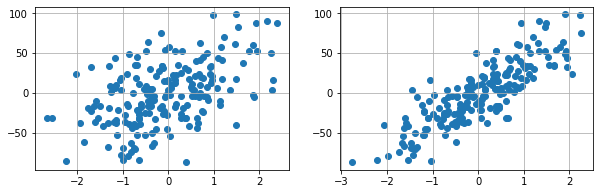

In [38]:
fix, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(X[:,0],y)
ax[0].grid(True)
ax[1].scatter(X[:,1],y)
ax[1].grid(True)
plt.show()

### Inserting random outliers in the data

In [39]:
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(100, 200, 4)

### Plot to show the inserted outliers

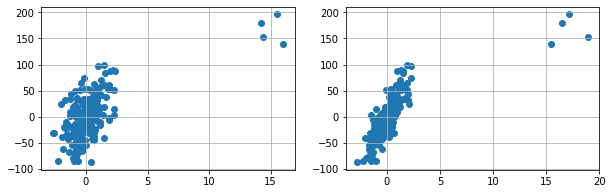

In [40]:
fix, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(X[:,0],y)
ax[0].grid(True)
ax[1].scatter(X[:,1],y)
ax[1].grid(True)
plt.show()

### Create a `HuberRegressor` object and fit

The Huber Regressor optimizes the squared loss for the samples where $|\frac{y - X'w}{\sigma}| < \epsilon$ and the absolute loss for the samples where $|\frac{y - X'w}{\sigma}| < \epsilon$, where $w$ and $\sigma$ are parameters to be optimized. 

The parameter $\sigma$ makes sure that if $y$ is scaled up or down by a certain factor, one does not need to rescale epsilon to achieve the same robustness. Note that this does not take into account the fact that the different features of $X$ may be of different scales.

In [43]:
huber = HuberRegressor()

In [44]:
huber.fit(X,y)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [51]:
X[1].reshape(1,-1)

array([[16.02763376, 15.44883183]])

In [50]:
huber.predict(X[1].reshape(1,-1))

array([763.50484115])

### A simple linear regression fit for comparison

In [23]:
linear = LinearRegression()

In [24]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Compare the estimated coefficients

As we will see, the Huber regressor estimates the coefficients, in the presence of outliers, far better (closer to the true values) than a simple linear model.

In [52]:
print("True coefficients:", coef)
print("Huber coefficients:", huber.coef_)
print("Linear Regression coefficients:", linear.coef_)

True coefficients: [20.4923687  34.16981149]
Huber coefficients: [17.79064226 31.01065329]
Linear Regression coefficients: [ 3.63326689 10.82594129]


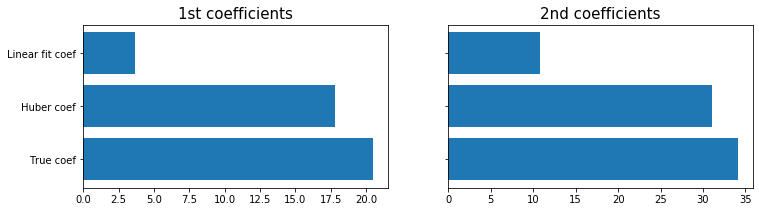

In [65]:
fix, ax = plt.subplots(1,2,figsize=(12,3),sharey=True)
ax[0].barh(['True coef','Huber coef', 'Linear fit coef'],width=[coef[0],huber.coef_[0],linear.coef_[0]])
ax[0].set_title("1st coefficients",fontsize=15)
ax[1].barh(['True coef','Huber coef', 'Linear fit coef'],width=[coef[1],huber.coef_[1],linear.coef_[1]])
ax[1].set_title("2nd coefficients",fontsize=15)
plt.show()